In [3]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

from fastai.io import *
from fastai.conv_learner import *
from fastai.column_data import *

from torchtext import vocab, data

from fastai.nlp import *
from fastai.lm_rnn import *

In [4]:
import csv

In [5]:
PATH = "D:/FAST.Ai/DL1/Data/Sharif/"

In [68]:
f = open(f'{PATH}2_class_100_mb.csv','r')
rows = csv.reader(f)

In [69]:
df = pd.DataFrame(columns=np.arange(248))

In [70]:
L = []

In [71]:
n_sub_row = 2200

In [72]:
for i in range(n_sub_row):
    x = next(rows)
    z = x[7][1:-1]
    c = z.split(",(")
    c[0] = c[0][1:-1]
    for i in range(1,16):
        c[i] = c[i][:-1]
    G = []
    for i in range(16):
        G += c[i].split(",")
    G = x[:7] + G + x[8:-1]
    L.append(G)
    #print(G,"\n\n\n\n")
    #print(len(G),"\n\n\n\n\n")
    #df.loc[i] = G
    #dh.loc[i] = i

In [73]:
len(L)

2200

In [74]:
df = pd.DataFrame(L)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,1644373,0.0.0.0,0.0.0.0,0,0,Tor-100-Website,archive,t,0,f,...,f,f,f,f,0,3332234566,182,1448,f46d04cff2d024e9b3985a4a0800450005dc1abe400030...,2
1,1970915,0.0.0.0,0.0.0.0,0,0,Tor-100-Website,youtube,t,0,f,...,f,f,f,f,0,958145148,1061,1448,f46d04cff2d024e9b3985a4a0800450005dc9586400032...,0
2,148906,0.0.0.0,0.0.0.0,0,0,Tor-100-Website,youtube,t,0,f,...,f,f,f,f,0,1766396614,1452,1448,2cfda15e920724e9b3985a4a0800450005dcc368400034...,2
3,541693,0.0.0.0,0.0.0.0,0,0,Tor-100-Website,archive,t,0,f,...,t,f,f,f,0,202555601,501,1274,f46d04cff2d024e9b3985a4a08004500052e49b8400032...,0
4,1822385,0.0.0.0,0.0.0.0,0,0,Tor-100-Website,archive,t,0,f,...,f,f,f,f,0,1517459872,1392,1448,2cfda15e920724e9b3985a4a0800450005dcd28f400027...,0


In [75]:
(df[19].astype(int))[0]

182

In [76]:
df[19][0]

'182'

In [77]:
df = df.drop([1,2,3,4,5],axis=1)

In [78]:
243 - 16

227

# Checking categories again

### 4'th one 

In [79]:
df_4 = df[np.arange(19,247,15)]

In [80]:
df_4.head()

,19,34,49,64,79,94,109,124,139,154,169,184,199,214,229,244
0,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182
1,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061
2,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452,1452
3,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501
4,1391,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392,1392


In [81]:
freq = Counter(df_4[c][r]  for c in np.arange(19,247,15) for r in range(n_sub_row))   
cat1 = len(freq) # categorical 
cat1

438

In [82]:
itos_df_4 = [o for o,c in freq.most_common(cat1)]

In [83]:
itos_df_4.insert(0, '_unk')

In [20]:
stoi_df_4 = collections.defaultdict(lambda:0 , {v:k for k,v in enumerate(itos_df_4)})

In [21]:
df_4_copy = df_4.copy()

In [22]:
for c in np.arange(19,247,15):
    for r in range(n_sub_row):
        df_4_copy[c][r] = stoi_df_4[df_4[c][r]]

In [26]:
(df_4_copy.astype(int).max()).max()

438

### 5'th one 

In [35]:
df_5 = df[np.arange(20,247,15)]

In [36]:
freq = Counter(df_5[c][r]  for c in np.arange(20,247,15) for r in range(n_sub_row))   
cat2 = len(freq) # categorical 
cat2

690

In [37]:
itos_df_5 = [o for o,c in freq.most_common(cat2)]

In [38]:
itos_df_5.insert(0, '_unk')

In [39]:
stoi_df_5 = collections.defaultdict(lambda:0 , {v:k for k,v in enumerate(itos_df_5)})

In [40]:
df_5_copy = df_5.copy()

In [43]:
for c in np.arange(20,247,15):
    for r in range(n_sub_row):
        df_5_copy[c][r] = stoi_df_5[df_5[c][r]]

# long_columns

In [44]:
j = 21
long_columns=[]
for i in range(16):
    long_columns.append(j)
    j = j + 15

In [45]:
df_long_columns = df[long_columns]

In [84]:
dh = df.copy()

In [85]:
train_cats(dh)

In [86]:
dh,y,nas = proc_df(dh,6)

# because proc_df turn 1 number into two numbers

In [87]:
dh[np.arange(19,247,15)] = df_4_copy.astype(int)

In [88]:
dh[np.arange(20,247,15)] = df_5_copy.astype(int)

In [89]:
dh[long_columns]=df_long_columns

In [54]:
np.save(f'{PATH}tmp/y_neat.npy', y)

In [61]:
y = np.load(f'{PATH}tmp/y_neat.npy')

In [55]:
y.shape

(2200,)

In [90]:
freq = Counter(char  for c in long_columns for r in range(n_sub_row) for char in dh[c][r])   
itos = [o for o,c in freq.most_common(len(freq))]

In [91]:
itos.insert(0, '_unk')
itos.insert(1, '_eos')
itos.insert(2, 'p')
stoi = collections.defaultdict(lambda:0 , {v:k for k,v in enumerate(itos)})

In [92]:
itos

['_unk',
 '_eos',
 'p',
 '0',
 '4',
 '2',
 '8',
 'a',
 '5',
 '9',
 '1',
 'c',
 '3',
 'e',
 'f',
 'd',
 'b',
 '6',
 '7']

In [93]:
len(itos)

19

In [164]:
long_col_df = dh[long_columns]
long_col_df

,21,36,51,66,81,96,111,126,141,156,171,186,201,216,231,246
0,f46d04cff2d024e9b3985a4a0800450005dc1aae400030...,f46d04cff2d024e9b3985a4a0800450005dc1aaf400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab0400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab1400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab2400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab3400030...,f46d04cff2d024e9b3985a4a080045000b841ab4400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab6400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab7400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab8400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab9400030...,f46d04cff2d024e9b3985a4a0800450005dc1aba400030...,f46d04cff2d024e9b3985a4a0800450005dc1abb400030...,f46d04cff2d024e9b3985a4a0800450005dc1abc400030...,f46d04cff2d024e9b3985a4a0800450005dc1abd400030...,f46d04cff2d024e9b3985a4a0800450005dc1abe400030...
1,f46d04cff2d024e9b3985a4a0800450005dc9577400032...,f46d04cff2d024e9b3985a4a0800450005dc9578400032...,f46d04cff2d024e9b3985a4a0800450005dc9579400032...,f46d04cff2d024e9b3985a4a0800450005dc957a400032...,f46d04cff2d024e9b3985a4a0800450005dc957b400032...,f46d04cff2d024e9b3985a4a0800450005dc957c400032...,f46d04cff2d024e9b3985a4a0800450005dc957d400032...,f46d04cff2d024e9b3985a4a0800450005dc957e400032...,f46d04cff2d024e9b3985a4a0800450005dc957f400032...,f46d04cff2d024e9b3985a4a0800450005dc9580400032...,f46d04cff2d024e9b3985a4a0800450005dc9581400032...,f46d04cff2d024e9b3985a4a0800450005dc9582400032...,f46d04cff2d024e9b3985a4a0800450005dc9583400032...,f46d04cff2d024e9b3985a4a0800450005dc9584400032...,f46d04cff2d024e9b3985a4a0800450005dc9585400032...,f46d04cff2d024e9b3985a4a0800450005dc9586400032...
2,2cfda15e920724e9b3985a4a0800450005dcc358400034...,2cfda15e920724e9b3985a4a0800450005dcc359400034...,2cfda15e920724e9b3985a4a0800450005dcc35a400034...,2cfda15e920724e9b3985a4a0800450005dcc35b400034...,2cfda15e920724e9b3985a4a0800450005dcc35c400034...,2cfda15e920724e9b3985a4a0800450005dcc35d400034...,2cfda15e920724e9b3985a4a0800450005dcc35e400034...,2cfda15e920724e9b3985a4a0800450005dcc35f400034...,2cfda15e920724e9b3985a4a0800450005dcc360400034...,2cfda15e920724e9b3985a4a0800450005dcc361400034...,2cfda15e920724e9b3985a4a080045000192c362400034...,2cfda15e920724e9b3985a4a0800450005dcc364400034...,2cfda15e920724e9b3985a4a0800450005dcc365400034...,2cfda15e920724e9b3985a4a0800450005dcc366400034...,2cfda15e920724e9b3985a4a0800450005dcc367400034...,2cfda15e920724e9b3985a4a0800450005dcc368400034...
3,f46d04cff2d024e9b3985a4a0800450005dc49a4400032...,f46d04cff2d024e9b3985a4a0800450005dc49a5400032...,f46d04cff2d024e9b3985a4a0800450005dc49a6400032...,f46d04cff2d024e9b3985a4a0800450005dc49a7400032...,f46d04cff2d024e9b3985a4a0800450005dc49a8400032...,f46d04cff2d024e9b3985a4a080045000b8449a9400032...,f46d04cff2d024e9b3985a4a0800450005dc49ab400032...,f46d04cff2d024e9b3985a4a0800450005dc49ac400032...,f46d04cff2d024e9b3985a4a08004500042149ad400032...,f46d04cff2d024e9b3985a4a080045000b8449af400032...,f46d04cff2d024e9b3985a4a0800450005dc49b1400032...,f46d04cff2d024e9b3985a4a0800450005dc49b2400032...,f46d04cff2d024e9b3985a4a0800450005dc49b3400032...,f46d04cff2d024e9b3985a4a08004500024449b4400032...,f46d04cff2d024e9b3985a4a080045000b8449b6400032...,f46d04cff2d024e9b3985a4a08004500052e49b8400032...
4,2cfda15e920724e9b3985a4a0800450005dcd27b400027...,2cfda15e920724e9b3985a4a0800450000bdd27c400027...,2cfda15e920724e9b3985a4a0800450005dcd280400027...,2cfda15e920724e9b3985a4a080045000a79d281400027...,2cfda15e920724e9b3985a4a0800450005dcd283400027...,2cfda15e920724e9b3985a4a0800450005dcd284400027...,2cfda15e920724e9b3985a4a0800450005dcd285400027...,2cfda15e920724e9b3985a4a0800450005dcd286400027...,2cfda15e920724e9b3985a4a0800450005dcd287400027...,2cfda15e920724e9b3985a4a0800450005dcd288400027...,2cfda15e920724e9b3985a4a0800450005dcd289400027...,2cfda15e920724e9b3985a4a0800450005dcd28a400027...,2cfda15e920724e9b3985a4a0800450003d8d28c400027...,2cfda15e920724e9b3985a4a0800450005dcd28d400027...,2cfda15e920724e9b3985a4a0800450

In [ ]:
long_col_df_copy = long_col_df.copy()

In [167]:
for r in range(n_sub_row):
    for c in long_columns:
        long_col_df_copy[c][r] = long_col_df[c][r].rjust(3000, 'p')

In [168]:
long_col_df_copy.to_pickle(f'{PATH}tmp/long_col_df_neat')

In [56]:
long_col_df = pd.read_pickle(f'{PATH}tmp/long_col_df_neat')

In [57]:
long_col_df

,21,36,51,66,81,96,111,126,141,156,171,186,201,216,231,246
0,f46d04cff2d024e9b3985a4a0800450005dc1aae400030...,f46d04cff2d024e9b3985a4a0800450005dc1aaf400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab0400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab1400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab2400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab3400030...,f46d04cff2d024e9b3985a4a080045000b841ab4400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab6400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab7400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab8400030...,f46d04cff2d024e9b3985a4a0800450005dc1ab9400030...,f46d04cff2d024e9b3985a4a0800450005dc1aba400030...,f46d04cff2d024e9b3985a4a0800450005dc1abb400030...,f46d04cff2d024e9b3985a4a0800450005dc1abc400030...,f46d04cff2d024e9b3985a4a0800450005dc1abd400030...,f46d04cff2d024e9b3985a4a0800450005dc1abe400030...
1,f46d04cff2d024e9b3985a4a0800450005dc9577400032...,f46d04cff2d024e9b3985a4a0800450005dc9578400032...,f46d04cff2d024e9b3985a4a0800450005dc9579400032...,f46d04cff2d024e9b3985a4a0800450005dc957a400032...,f46d04cff2d024e9b3985a4a0800450005dc957b400032...,f46d04cff2d024e9b3985a4a0800450005dc957c400032...,f46d04cff2d024e9b3985a4a0800450005dc957d400032...,f46d04cff2d024e9b3985a4a0800450005dc957e400032...,f46d04cff2d024e9b3985a4a0800450005dc957f400032...,f46d04cff2d024e9b3985a4a0800450005dc9580400032...,f46d04cff2d024e9b3985a4a0800450005dc9581400032...,f46d04cff2d024e9b3985a4a0800450005dc9582400032...,f46d04cff2d024e9b3985a4a0800450005dc9583400032...,f46d04cff2d024e9b3985a4a0800450005dc9584400032...,f46d04cff2d024e9b3985a4a0800450005dc9585400032...,f46d04cff2d024e9b3985a4a0800450005dc9586400032...
2,2cfda15e920724e9b3985a4a0800450005dcc358400034...,2cfda15e920724e9b3985a4a0800450005dcc359400034...,2cfda15e920724e9b3985a4a0800450005dcc35a400034...,2cfda15e920724e9b3985a4a0800450005dcc35b400034...,2cfda15e920724e9b3985a4a0800450005dcc35c400034...,2cfda15e920724e9b3985a4a0800450005dcc35d400034...,2cfda15e920724e9b3985a4a0800450005dcc35e400034...,2cfda15e920724e9b3985a4a0800450005dcc35f400034...,2cfda15e920724e9b3985a4a0800450005dcc360400034...,2cfda15e920724e9b3985a4a0800450005dcc361400034...,pppppppppppppppppppppppppppppppppppppppppppppp...,2cfda15e920724e9b3985a4a0800450005dcc364400034...,2cfda15e920724e9b3985a4a0800450005dcc365400034...,2cfda15e920724e9b3985a4a0800450005dcc366400034...,2cfda15e920724e9b3985a4a0800450005dcc367400034...,2cfda15e920724e9b3985a4a0800450005dcc368400034...
3,f46d04cff2d024e9b3985a4a0800450005dc49a4400032...,f46d04cff2d024e9b3985a4a0800450005dc49a5400032...,f46d04cff2d024e9b3985a4a0800450005dc49a6400032...,f46d04cff2d024e9b3985a4a0800450005dc49a7400032...,f46d04cff2d024e9b3985a4a0800450005dc49a8400032...,f46d04cff2d024e9b3985a4a080045000b8449a9400032...,f46d04cff2d024e9b3985a4a0800450005dc49ab400032...,f46d04cff2d024e9b3985a4a0800450005dc49ac400032...,pppppppppppppppppppppppppppppppppppppppppppppp...,f46d04cff2d024e9b3985a4a080045000b8449af400032...,f46d04cff2d024e9b3985a4a0800450005dc49b1400032...,f46d04cff2d024e9b3985a4a0800450005dc49b2400032...,f46d04cff2d024e9b3985a4a0800450005dc49b3400032...,pppppppppppppppppppppppppppppppppppppppppppppp...,f46d04cff2d024e9b3985a4a080045000b8449b6400032...,pppppppppppppppppppppppppppppppppppppppppppppp...
4,2cfda15e920724e9b3985a4a0800450005dcd27b400027...,pppppppppppppppppppppppppppppppppppppppppppppp...,2cfda15e920724e9b3985a4a0800450005dcd280400027...,2cfda15e920724e9b3985a4a080045000a79d281400027...,2cfda15e920724e9b3985a4a0800450005dcd283400027...,2cfda15e920724e9b3985a4a0800450005dcd284400027...,2cfda15e920724e9b3985a4a0800450005dcd285400027...,2cfda15e920724e9b3985a4a0800450005dcd286400027...,2cfda15e920724e9b3985a4a0800450005dcd287400027...,2cfda15e920724e9b3985a4a0800450005dcd288400027...,2cfda15e920724e9b3985a4a0800450005dcd289400027...,2cfda15e920724e9b3985a4a0800450005dcd28a400027...,pppppppppppppppppppppppppppppppppppppppppppppp...,2cfda15e920724e9b3985a4a0800450005dcd28d400027...,2cfda15e920724e9b3985a4a0800450

In [119]:
len_long_col_df = pd.DataFrame(np.zeros((n_sub_row,len(long_columns))) , columns=long_columns)

for r in range(n_sub_row):
    for c in long_columns:
         len_long_col_df[c][r] = len(long_col_df[c][r])

len_long_col_df.min(0)

21     3000.0
36     3000.0
51     3000.0
66     3000.0
81     3000.0
96     3000.0
111    3000.0
126    3000.0
141    3000.0
156    3000.0
171    3000.0
186    3000.0
201    3000.0
216    3000.0
231    3000.0
246    3000.0
dtype: float64

In [123]:
(((dh == np.nan).any())== True).any()

False

In [61]:
T(dh)


  752     1     1  ...      2     1     3
 1086     1     1  ...     16     1     1
  554     1     1  ...      1     1     3
       ...          ⋱          ...       
   61     1     1  ...      8     4     1
 1644     1     1  ...     35     1     1
  155     1     1  ...     21     1     2
[torch.LongTensor of size 2200x226]

In [94]:
long2num = pd.DataFrame([[stoi[char] for c in long_columns for char in long_col_df[c][r]]  for r in range(n_sub_row)])

In [95]:
dh = dh.drop(long_columns,axis=1)

In [96]:
dh.values

array([[ 752,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1, 1206,    2,    1,    1,
         947,    1,    1,    1, ...,    1,    1, 1203,    2,    1,    1,  513,    1,    1,    1,    1,    1,
           1,    1,    1,    1, 1200,    2,    1,    3],
       [1086,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1, 2181,   16,    1,    1,
         927,    1,    1,    1, ...,    1,    1, 2182,   16,    1,    1,  361,    1,    1,    1,    1,    1,
           1,    1,    1,    1, 2181,   16,    1,    1],
       [ 554,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,  297,    1,    1,    1,
         371,    1,    1,    1, ...,    1,    1,  303,    1,    1,    1,  736,    1,    1,    1,    1,    1,
           1,    1,    1,    1,  301,    1,    1,    3],
       [1653,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,  473,    3,    1,    1,
         216,    1,    1,    1, ...,    1,    1,  481,    3,    2,    1, 1602,    1,  

In [97]:
dh.to_pickle(f'{PATH}tmp/dh_neat')

In [5]:
dh = pd.read_pickle(f'{PATH}tmp/dh_neat')

In [172]:
(((long2num == np.nan).any())== True).any()

False

In [98]:
T(dh)


  752     1     1  ...      2     1     3
 1086     1     1  ...     16     1     1
  554     1     1  ...      1     1     3
       ...          ⋱          ...       
   61     1     1  ...      8     4     1
 1644     1     1  ...     35     1     1
  155     1     1  ...     21     1     2
[torch.LongTensor of size 2200x226]

In [99]:
t_dh = T(dh)

In [75]:
t_dh4 = t_dh[:,np.arange(14,225,14)]

In [76]:
t_dh4


 1448  1448  1448  ...   1448  1448  1448
 1448  1448  1448  ...   1448  1448  1448
 1448  1448  1448  ...   1448  1448  1448
       ...          ⋱          ...       
 1298  2596  1298  ...   1298  1298  1298
 1266  1448  1448  ...   2179  1448  1448
 1448  1448  1448  ...   1448  1448  1448
[torch.LongTensor of size 2200x16]

In [135]:
dh_20 = dh[np.arange(20,247,15)]

In [134]:
dh_19 = dh[np.arange(19,247,15)]

In [108]:
np.arange(20,247,15)

array([ 20,  35,  50,  65,  80,  95, 110, 125, 140, 155, 170, 185, 200, 215, 230, 245])

In [110]:
for i in range(20,247,15):
    print(i)

20
35
50
65
80
95
110
125
140
155
170
185
200
215
230
245


In [129]:
freq = Counter(dh_20[c][r]  for c in np.arange(20,247,15) for r in range(n_sub_row))
len(freq)

142

In [137]:
freq = Counter(dh_19[c][r]  for c in np.arange(19,247,15) for r in range(n_sub_row))
len(freq)

229

In [131]:
dh

,0,7,8,9,10,11,12,13,14,15,...,237,238,239,240,241,242,243,244,245,247
0,752,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1200,91,39,3
1,1086,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2181,17,39,1
2,554,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,301,64,39,3
3,1653,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,476,139,23,1
4,959,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,185,54,39,1
5,1273,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,404,64,39,1
6,1933,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1053,91,39,1
7,1773,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,398,64,39,3
8,184,1,1,1,1,1,1,2,1,1,...,1,1,1,1,1,1,491,64,39,1
9,603,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,913,64,39,1


In [130]:
dh_20

,20,35,50,65,80,95,110,125,140,155,170,185,200,215,230,245
0,41,41,31,34,37,34,76,42,46,40,45,40,46,48,42,39
1,41,41,31,34,37,34,46,42,46,40,45,40,46,48,42,39
2,41,41,31,34,37,34,46,42,46,40,78,40,46,48,42,39
3,41,41,31,34,37,60,46,42,2,70,45,40,46,99,72,23
4,41,32,31,55,37,34,46,42,46,40,45,40,112,48,42,39
5,41,41,31,34,37,34,46,42,46,40,45,40,46,48,42,39
6,41,41,31,34,37,34,46,42,46,40,45,40,46,48,42,39
7,41,105,31,34,37,34,46,5,6,40,45,40,46,48,42,39
8,121,41,31,34,37,34,46,42,46,40,45,15,46,48,42,39
9,41,23,31,34,37,34,46,42,50,40,45,40,46,48,7,39


In [132]:
freq = Counter(df[c][r]  for c in np.arange(20,247,15) for r in range(n_sub_row))
len(freq)

690

In [242]:
t_new_df = T(new_df)

In [245]:
freq = Counter(t_new_df[r][c]  for c in np.arange(13,225,14) for r in range(n_sub_row))
len(freq)

438

In [243]:
freq = Counter(t_new_df[r][c]  for c in np.arange(14,225,14) for r in range(n_sub_row))
len(freq)

690

In [100]:
len(set(t_dh[:,225]))

3

In [284]:
T(long2num)


   14     4    17  ...     10    17    16
   14     4    17  ...     12    15     6
    5     9    14  ...      5    16     4
       ...          ⋱          ...       
   14     4    17  ...     11    14    15
    5     9    14  ...      7    13     8
    5     9    14  ...     13     4     6
[torch.LongTensor of size 500x48000]

In [102]:
new_df = pd.concat([dh,long2num],axis=1)

In [103]:
new_df.to_pickle(f'{PATH}tmp/new_df_neat')

In [83]:
new_df = pd.read_pickle(f'{PATH}tmp/new_df_neat')

In [84]:
new_df

,0,7,8,9,10,11,12,13,14,15,...,47990,47991,47992,47993,47994,47995,47996,47997,47998,47999
0,752,1,1,1,1,1,1,1,1,1,...,11,17,10,11,4,15,5,9,17,15
1,1086,1,1,1,1,1,1,1,1,1,...,6,7,12,9,8,9,8,12,16,6
2,554,1,1,1,1,1,1,1,1,1,...,15,16,10,6,5,6,12,5,15,4
3,1653,1,1,1,1,1,1,1,1,1,...,7,13,8,6,16,14,3,12,6,18
4,959,1,1,1,1,1,1,1,1,1,...,4,10,5,13,14,11,16,4,10,5
5,1273,1,1,1,1,1,1,1,1,1,...,13,8,9,17,18,16,12,14,17,4
6,1933,1,1,1,1,1,1,1,1,1,...,18,11,15,14,18,15,8,13,11,13
7,1773,1,1,1,1,1,1,1,1,1,...,10,15,10,13,13,13,11,10,8,12
8,184,1,1,1,1,1,1,2,1,1,...,14,16,5,18,13,11,13,13,12,3
9,603,1,1,1,1,1,1,1,1,1,...,17,15,15,17,8,3,14,15,13,8


In [104]:
n_hidden = 30
n_classes = 2
num_non_seq_cols = 226
num_other_cols = 2
n_fac = 10
out_additional = 4
n_fac_T_F = 5

In [105]:
new_df.values

array([[ 752,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1, 1206,    2,    1,    1,
         947,    1,    1,    1, ...,    7,    8,    7,   13,   13,   18,   11,   11,   13,   11,   11,   17,
          10,   11,    4,   15,    5,    9,   17,   15],
       [1086,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1, 2181,   16,    1,    1,
         927,    1,    1,    1, ...,    3,   11,    4,   11,   16,   10,    8,   10,    6,   12,    6,    7,
          12,    9,    8,    9,    8,   12,   16,    6],
       [ 554,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,  297,    1,    1,    1,
         371,    1,    1,    1, ...,    7,    4,    8,   16,    9,   10,    9,   16,   12,   18,   15,   16,
          10,    6,    5,    6,   12,    5,   15,    4],
       [1653,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,  473,    3,    1,    1,
         216,    1,    1,    1, ...,   15,   13,   11,   12,    9,    3,   14,   14,  

In [106]:
val_idxs = np.random.permutation(len(new_df))[:n_sub_row//5]

In [106]:
new_df = pd.read_pickle(f'{PATH}tmp/new_df_neat')
y = np.load(f'{PATH}tmp/y_neat.npy')

In [107]:
md = ColumnarModelData.from_arrays(".", val_idxs , new_df.values, y= y,bs=4)#.astype(float) .astype(LongTensor)

In [108]:
class thirdNlpModel(nn.Module):
    def __init__(self,vocab_size, n_fac):
        super().__init__()
        
        self.e = nn.Embedding(vocab_size, n_fac)
        self.non_seq_e_list = []
        for k in range(9):
            self.non_seq_e_list.append(nn.Embedding(2+1,n_fac_T_F) )
        self.non_seq_e_list.append(nn.Embedding(cat1 + 1,n_fac))
        self.non_seq_e_list.append(nn.Embedding(cat2+1,n_fac))
        
        self.rnn = nn.GRU(n_fac, n_hidden)
        self.l  = nn.Linear(n_hidden+n_fac_T_F*9+2*n_fac+2,n_hidden*2)
        self.l2 = nn.Linear(2,out_additional)
        self.l_out = nn.Linear((n_hidden*2)*16 + out_additional ,n_classes)
        
    def forward(self,*cs):
        x = torch.stack(cs, dim=1)#.long()
        x = x.transpose(0,1)
        bs = cs[0].size(0)
        
        t=self.handle_data(bs,x)
        additional = self.l2(x[[0,225]].transpose(0,1).float())
        x = torch.cat((t,additional),1)
        x = F.tanh(x)
        x = self.l_out(x)
        x = F.log_softmax(x)
        return(x)
    
    def handle_data(self,bs,x):
        h = V(torch.zeros(1, bs, n_hidden))
        List = []
        for i in range(16):
            inp = self.e(x[num_non_seq_cols+ i*3000 : num_non_seq_cols+ ((i+1)*3000) -2000])# -2000 beacause of limitation of computation
            outp,h = self.rnn(inp, h)
            
            non_seq_e_t = self.non_seq_e_list[0](x[i*14 + 1])
            p = 1
            for j in range(3,15):
                if (j==11 or j==12): continue
                #print("\nindex:\n",i*14 + j)
                #print("\np:\n",p)
                non_seq_e_t = torch.cat((non_seq_e_t, self.non_seq_e_list[p](x[i*14 + j])),1)
                p+=1
            
            i_index = i*14
            continous = x[[i_index+2,i_index+12]].transpose(0,1).float()
            non_seq_e_t = torch.cat((non_seq_e_t,continous),1)
            
            out2 = self.l(torch.cat((non_seq_e_t,outp[-1]),1))
            List.append(out2)
            h = repackage_var(h)
        
        t = List[0]
        for j in range(len(List)-1):
            t = torch.cat((t,List[j+1]),1)
        return t

In [109]:
m = thirdNlpModel(19,n_fac) #19 is len(itos)

In [110]:
opt = optim.Adam(m.parameters(), 1e-2)

In [ ]:
fit(m, md, 1, opt, F.nll_loss,metrics = [accuracy])

  1%|▊                                                                    | 5/440 [01:04<1:35:28, 13.17s/it, loss=1.58]

In [302]:
#opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [303]:
#learn = RNN_Learner(md, SingleModel(to_gpu(m)), opt_fn=opt_fn)

In [40]:
#learn.lr_find()
#learn.sched.plot()

# embedding for last one 

In [ ]:
new_df = pd.read_pickle(f'{PATH}tmp/new_df_neat')

In [9]:
val_idxs = np.random.permutation(len(new_df))[:n_sub_row//5]

In [10]:
new_df = pd.read_pickle(f'{PATH}tmp/new_df_neat')
y = np.load(f'{PATH}tmp/y_neat.npy')

In [11]:
md = ColumnarModelData.from_arrays(".", val_idxs , new_df.values, y= y,bs=4)#.astype(float) .astype(LongTensor)

In [ ]:
n_hidden = 30
n_classes = 2
num_non_seq_cols = 226
num_other_cols = 2
n_fac = 10
out_additional = 3
n_fac_T_F = 5

In [ ]:
class thirdNlpModel(nn.Module):
    def __init__(self,vocab_size, n_fac):
        super().__init__()
        
        self.e = nn.Embedding(vocab_size, n_fac)
        self.e225 = nn.Embedding(3+1, n_fac)
        self.non_seq_e_list = []
        for k in range(9):
            self.non_seq_e_list.append(nn.Embedding(2+1,n_fac_T_F) )
        self.non_seq_e_list.append(nn.Embedding(cat1+1,n_fac))
        self.non_seq_e_list.append(nn.Embedding(cat2+1,n_fac))
        
        self.rnn = nn.GRU(n_fac, n_hidden)
        self.l  = nn.Linear(n_hidden+n_fac_T_F*9+2*n_fac+2,n_hidden*2)
        self.l2 = nn.Linear(2,out_additional)
        self.l_out = nn.Linear((n_hidden*2)*16 +out_additional+n_fac ,n_classes)
        
    def forward(self,*cs):
        x = torch.stack(cs, dim=1)#.long()
        x = x.transpose(0,1)
        bs = cs[0].size(0)
        
        t=self.handle_data(bs,x)
        additional = self.l2(x[[0]].transpose(0,1).float())
        additional = torch.cat((self.e225(x[225]),additional),1)
        x = torch.cat((t,additional),1)
        x = F.tanh(x)
        x = self.l_out(x)
        x = F.log_softmax(x)
        return(x)
    
    def handle_data(self,bs,x):
        h = V(torch.zeros(1, bs, n_hidden))
        List = []
        for i in range(16):
            inp = self.e(x[num_non_seq_cols+ i*3000 : num_non_seq_cols+ ((i+1)*3000) -2000])# -2000 beacause of limitation of computation
            outp,h = self.rnn(inp, h)
            
            non_seq_e_t = self.non_seq_e_list[0](x[i*14 + 1])
            p = 1
            for j in range(3,15):
                if (j==11 or j==12): continue
                #print("\nindex:\n",i*14 + j)
                #print("\np:\n",p)
                non_seq_e_t = torch.cat((non_seq_e_t, self.non_seq_e_list[p](x[i*14 + j])),1)
                p+=1
            
            i_index = i*14
            continous = x[[i_index+2,i_index+12]].transpose(0,1).float()
            non_seq_e_t = torch.cat((non_seq_e_t,continous),1)
            
            out2 = self.l(torch.cat((non_seq_e_t,outp[-1]),1))
            List.append(out2)
            h = repackage_var(h)
        
        t = List[0]
        for j in range(len(List)-1):
            t = torch.cat((t,List[j+1]),1)
        return t

In [54]:
m = thirdNlpModel(19,n_fac) #19 is len(itos)

In [55]:
opt = optim.Adam(m.parameters(), 1e-2)

In [15]:
fit(m, md, 1, opt, F.nll_loss,metrics = [accuracy])

epoch      trn_loss   val_loss   accuracy                                                                              
    0      1.6945     0.767553   0.59      



[array([0.76755]), 0.59]

# with Jeff hinton Idea

In [4]:
new_df = pd.read_pickle(f'{PATH}tmp/new_df_neat')

In [36]:
val_idxs = np.random.permutation(len(new_df))[:n_sub_row//5]

In [37]:
y = np.load(f'{PATH}tmp/y_neat.npy')

In [38]:
n_hidden = 30
n_classes = 2
num_non_seq_cols = 226
num_other_cols = 2
n_fac = 10
out_additional = 3
n_fac_T_F = 5
bs = 32

In [39]:
md = ColumnarModelData.from_arrays(".", val_idxs , new_df.values, y= y,bs=bs)#.astype(float) .astype(LongTensor)

In [46]:
class thirdNlpModel(nn.Module):
    def __init__(self,vocab_size, n_fac):
        super().__init__()
        
        self.e = nn.Embedding(vocab_size, n_fac)
        self.e225 = nn.Embedding(3+1, n_fac)
        self.non_seq_e_list = []
        for k in range(9):
            self.non_seq_e_list.append(nn.Embedding(2+1,n_fac_T_F) )
        self.non_seq_e_list.append(nn.Embedding(cat1+1,n_fac))
        self.non_seq_e_list.append(nn.Embedding(cat2+1,n_fac))
        
        self.rnn = nn.RNN(n_fac, n_hidden)
        self.l  = nn.Linear(n_hidden+n_fac_T_F*9+2*n_fac+2,n_hidden*2)
        self.l2 = nn.Linear(n_fac+1,out_additional)
        self.l_out = nn.Linear((n_hidden*2)*16 +out_additional ,n_classes)
        
    def forward(self,*cs):
        x = torch.stack(cs, dim=1)#.long()
        x = x.transpose(0,1)
        bs = cs[0].size(0)
        
        t=self.handle_data(bs,x)
        additional = x[[0]].transpose(0,1).float()
        additional = torch.cat((self.e225(x[225]),additional),1)
        additional = self.l2(additional)
        x = torch.cat((t,additional),1)
        x = F.tanh(x)
        x = self.l_out(x)
        x = F.log_softmax(x)
        return(x)
    
    def handle_data(self,bs,x):
        h = V(torch.zeros(1, bs, n_hidden))
        List = []
        for i in range(16):
            inp = self.e(x[num_non_seq_cols+ i*3000 : num_non_seq_cols+ ((i+1)*3000) -2000])# -2000 beacause of limitation of computation
            outp,h = self.rnn(inp, h)
            
            non_seq_e_t = self.non_seq_e_list[0](x[i*14 + 1])
            p = 1
            for j in range(3,15):
                if (j==11 or j==12): continue
                #print("\nindex:\n",i*14 + j)
                #print("\np:\n",p)
                non_seq_e_t = torch.cat((non_seq_e_t, self.non_seq_e_list[p](x[i*14 + j])),1)
                p+=1
            
            i_index = i*14
            continous = x[[i_index+2,i_index+12]].transpose(0,1).float()
            non_seq_e_t = torch.cat((non_seq_e_t,continous),1)
            
            out2 = self.l(torch.cat((non_seq_e_t,outp[-1]),1))
            List.append(out2)
            h = repackage_var(h)
        
        t = List[0]
        for j in range(len(List)-1):
            t = torch.cat((t,List[j+1]),1)
        return t

In [47]:
m = thirdNlpModel(19,n_fac) #19 is len(itos)

In [48]:
m.rnn.weight_hh_l0.data.copy_(torch.eye(n_hidden));

In [49]:
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [50]:
learn = RNN_Learner(md, SingleModel(to_gpu(m)), opt_fn=opt_fn)

 67%|███████████████████████████████████████████████▊                       | 37/55 [15:09<06:44, 22.48s/it, loss=1.38]

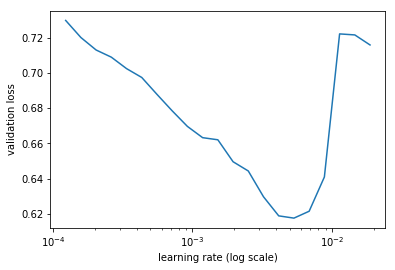

In [51]:
learn.lr_find()
learn.sched.plot()

In [52]:
lr= 6e-3

learn.fit(lr, 1,metrics = [accuracy]) #, cycle_len=12, use_clr=(20,10)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.711896   0.510914   0.770455  


[array([0.51091]), 0.7704545454545455]